# Requirements

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

# power info

1. Match_id

•numbers for uniquely identifying each match

•not any duplicate

•not any Null

2.Set_num

•Display sets in each match.

•not any Null

•The number of uniques in the set is three

•The most played sets are 2

3.Game_num

•This column has 13 Unique Values

•This column shows that each game has been played

4.Value

5.break_occurred

•Breaks allow players to rest physically and mentally and, if needed, return to the game with more energy and focus.


In [84]:
df_power.head()

,match_id,set_num,game_num,value,break_occurred
0,11674074,1,1,30.50,False
1,11674074,1,2,81.10,True
2,11674074,1,3,51.60,False
3,11674074,1,4,-33.80,False
4,11674074,1,5,-59.88,True


In [96]:
df_power.columns

Index(['match_id', 'set_num', 'game_num', 'value', 'break_occurred'], dtype='object')

In [97]:
df_power.describe()

,match_id,set_num,game_num,value
count,3.476000e+03,3476.000000,3476.000000,3476.000000
mean,1.169660e+07,1.634638,5.213751,0.005972
std,8.316256e+03,0.643281,2.959884,37.845621
min,1.167407e+07,1.000000,1.000000,-100.000000
25%,1.169722e+07,1.000000,3.000000,-27.400000
50%,1.169916e+07,2.000000,5.000000,10.000000
75%,1.170156e+07,2.000000,7.000000,26.280000
max,1.170352e+07,3.000000,13.000000,100.000000


In [94]:
df_away.head()


,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,11673958,Tirante T.,tirante-thiago-agustin,M,1519,La Plata,"La Plata, Argentina",1.85,78.0,right-handed,NaN,249335.0,430793.0,221515,123.0,TIR,Argentina,"Tirante, Thiago Agustin"
1,11673962,Heide G.,heide-gustavo,M,1177,NaN,Sao Paulo,1.88,NaN,right-handed,NaN,36929.0,87230.0,302582,247.0,HEI,Brazil,"Heide, Gustavo"
2,11673963,Jorda Sanchis D.,jorda-sanchis-david,M,344,Spain,"Barcelona, Spain",1.98,83.0,right-handed,NaN,27028.0,72338.0,57155,331.0,JOR,Spain,"Jorda Sanchis, David"
3,11673993,Roca Batalla O.,roca-batalla-oriol,M,707,Santa Coloma de Gramenet,Barcelona,1.75,75.0,right-handed,NaN,53418.0,317311.0,51100,213.0,ROC,Spain,"Roca Batalla, Oriol"
4,11674000,Crawford O.,crawford-oliver,M,442,"Spartanburg, SC","Spartanburg, SC, USA",1.80,84.0,right-handed,NaN,40191.0,113045.0,213057,215.0,CRA,USA,"Crawford, Oliver"


In [98]:
df_away.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       386 non-null    int64  
 1   name           386 non-null    object 
 2   slug           386 non-null    object 
 3   gender         386 non-null    object 
 4   user_count     386 non-null    int64  
 5   residence      116 non-null    object 
 6   birthplace     219 non-null    object 
 7   height         215 non-null    float64
 8   weight         113 non-null    float64
 9   plays          177 non-null    object 
 10  turned_pro     71 non-null     float64
 11  current_prize  374 non-null    float64
 12  total_prize    383 non-null    float64
 13  player_id      386 non-null    int64  
 14  current_rank   368 non-null    float64
 15  name_code      386 non-null    object 
 16  country        385 non-null    object 
 17  full_name      386 non-null    object 
dtypes: float64

In [99]:
df_away.nunique()

match_id         386
name             308
slug             308
gender             2
user_count       252
residence         89
birthplace       163
height            29
weight            31
plays              2
turned_pro        17
current_prize    284
total_prize      305
player_id        308
current_rank     261
name_code        256
country           54
full_name        308
dtype: int64

# 1.How many tennis players are included in the data set?

In [101]:
df_away_team = pd.read_csv('df_away_team.csv', usecols=['name'])
df_home_team = pd.read_csv('df_home_team.csv', usecols=['name'])

count = len(pd.concat([df_away_team, df_home_team])['name'].unique())
print('count_player', count)


count_player 596


# 2.Which player has the most wins?

In [102]:
df_event = pd.read_csv('df_event.csv')
df_away_team = pd.read_csv('df_away_team.csv')
df_home_team = pd.read_csv('df_home_team.csv')

df_event_combined = pd.merge(df_event, df_home_team[['match_id', 'name']],
how='left', on='match_id').merge(df_away_team[['match_id', 'name']],
how='left', on='match_id',suffixes=('_home', '_away'))

In [103]:
players_wins = df_event_combined.groupby('name_home')['winner_code'].apply(lambda x: (x == 1).sum()).add(df_event_combined.groupby('name_away')['winner_code'].apply(lambda x: (x == 2).sum()), fill_value=0)

max_wins = players_wins.max()
max_players = players_wins[players_wins == max_wins].index.tolist()

print("Players with the most wins:")
for player in max_players:
    home_wins_count = (df_event_combined['name_home'] == player) & (df_event_combined['winner_code'] == 1)
    away_wins_count = (df_event_combined['name_away'] == player) & (df_event_combined['winner_code'] == 2)
    print(f"Player: {player}, Home Wins: {home_wins_count.sum()}, Away Wins: {away_wins_count.sum()}")

Players with the most wins:
Player: Kalina V., Home Wins: 0, Away Wins: 3
Player: Milushev P., Home Wins: 2, Away Wins: 1
Player: Panaras A., Home Wins: 3, Away Wins: 0


# ⁘The players who have the highest rank

In [53]:
combined_df = pd.concat([df_home_team , df_away_team])
combined_df_sorted = combined_df.sort_values(by='current_rank', ascending=False).dropna(subset=['name', 'current_rank', 'country'])
combined_df_sorted

,name,current_rank,country
123,Rocens M.,1858.0,Latvia
339,Loccisano M.,1800.0,Germany
314,Fufygin M.,1800.0,Russia
82,Loccisano M.,1800.0,Germany
89,Mossur M.,1717.0,Ukraine
...,...,...,...
18,Medvedev D.,3.0,Russia
35,Sabalenka A.,2.0,Belarus
20,Alcaraz C.,2.0,Spain
23,Alcaraz C.,2.0,Spain


# ⁘Ranking of players by country

In [52]:
combined_df = pd.concat([df_home_team, df_away_team])
combined_df_sorted = combined_df.sort_values(by='current_rank', ascending=False).dropna(subset=['name', 'current_rank', 'country'])

grouped_df = combined_df_sorted.groupby('country')
mean_ranks = grouped_df['current_rank'].mean().sort_values(ascending=False)
mean_ranks

country
Bolivia            1489.000000
Uzbekistan         1363.000000
Nigeria            1359.000000
Morocco            1255.000000
Algeria            1241.000000
                      ...     
North Macedonia     215.000000
Egypt               208.500000
Jordan              187.000000
South Africa        140.000000
Kazakhstan          124.333333
Name: current_rank, Length: 70, dtype: float64

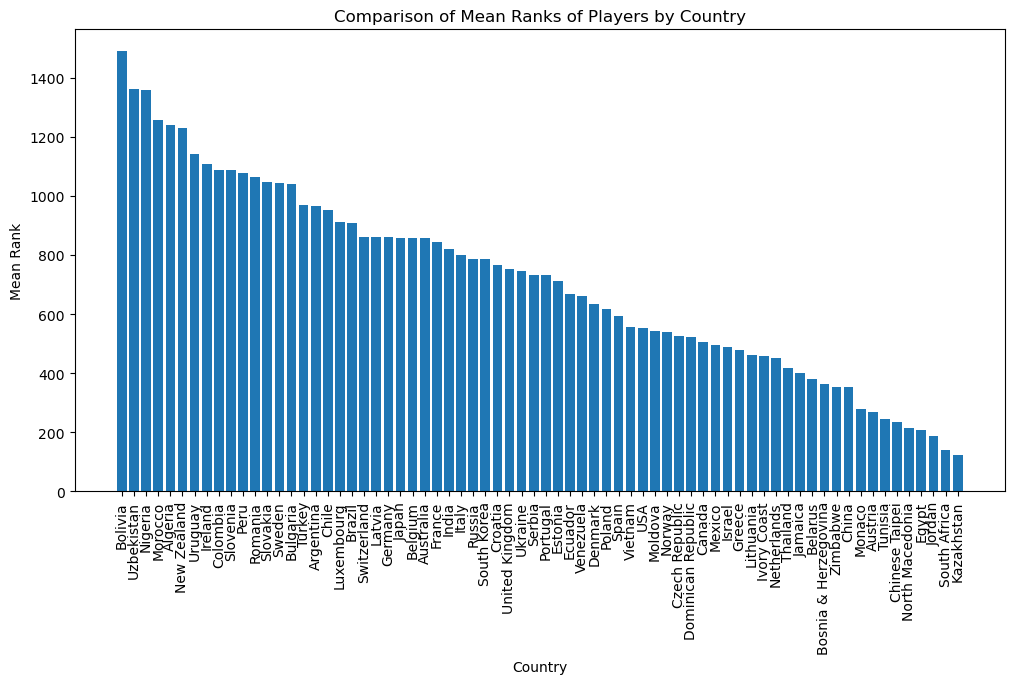

In [54]:
plt.figure(figsize=(12, 6))
plt.bar(mean_ranks.index, mean_ranks)
plt.xlabel('Country')
plt.ylabel('Mean Rank')
plt.title('Comparison of Mean Ranks of Players by Country')
plt.xticks(rotation=90)
plt.show()


# 3.Which country has produced the most successful tennis players?

In [7]:
df_away_team = pd.read_csv('df_away_team.csv', usecols=['name', 'current_rank', 'country'])
df_home_team = pd.read_csv('df_home_team.csv', usecols=['name', 'current_rank', 'country'])

combined_df = pd.concat([df_home_team, df_away_team])
sorted_df = combined_df.sort_values(by='current_rank', ascending=False)

grouped_df = sorted_df.groupby('country')
player_counts = grouped_df.size().sort_values(ascending=False)

top_country = player_counts.head(1).index[0]
top_country_players = sorted_df[(sorted_df['country'] == top_country) & (sorted_df['current_rank'] > 0)]

print("top_country", top_country)
print(top_country_players[['name', 'current_rank', 'country']])

top_country France
             name  current_rank country
144    Brosset S.        1498.0  France
360    Brosset S.        1498.0  France
312     Pierre H.        1495.0  France
120     Pierre H.        1495.0  France
350    Boureau A.        1481.0  France
..            ...           ...     ...
7      Gasquet R.          76.0  France
14   Mannarino A.          22.0  France
15   Mannarino A.          22.0  France
18     Humbert U.          20.0  France
70      Garcia C.          20.0  France

[81 rows x 3 columns]


# ⁘Show the country whose players are in the top ten players and also they are all from the same country

country France
             name  current_rank country
144    Brosset S.        1498.0  France
360    Brosset S.        1498.0  France
312     Pierre H.        1495.0  France
120     Pierre H.        1495.0  France
350    Boureau A.        1481.0  France
..            ...           ...     ...
7      Gasquet R.          76.0  France
14   Mannarino A.          22.0  France
15   Mannarino A.          22.0  France
18     Humbert U.          20.0  France
70      Garcia C.          20.0  France

[81 rows x 3 columns]
-----------------------


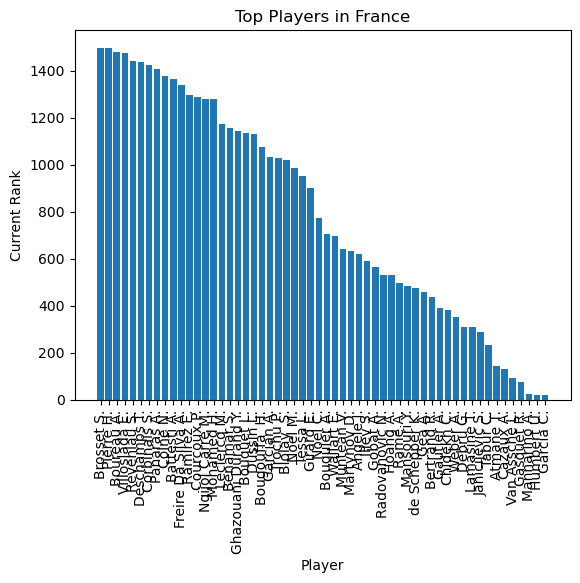

country Italy
                  name  current_rank country
100       Vatteroni L.        1578.0   Italy
83           Liucci F.        1495.0   Italy
309          Liucci F.        1495.0   Italy
82       Cortegiani A.        1428.0   Italy
374       Gagliardo L.        1415.0   Italy
216       Gagliardo L.        1415.0   Italy
421       Ciurletti A.        1411.0   Italy
211       Ciurletti A.        1411.0   Italy
90             Sada I.        1390.0   Italy
370            Sada I.        1390.0   Italy
313        Sposetti I.        1363.0   Italy
338           Ricca G.        1330.0   Italy
88            Ricca G.        1330.0   Italy
269    Martellenghi E.        1329.0   Italy
98         Traversi C.        1261.0   Italy
372        Traversi C.        1261.0   Italy
304          Caruso A.        1254.0   Italy
84           Caruso A.        1254.0   Italy
104         Plunger M.        1230.0   Italy
90   Militi Ribaldi A.        1188.0   Italy
418  Militi Ribaldi A.        1188.0   It

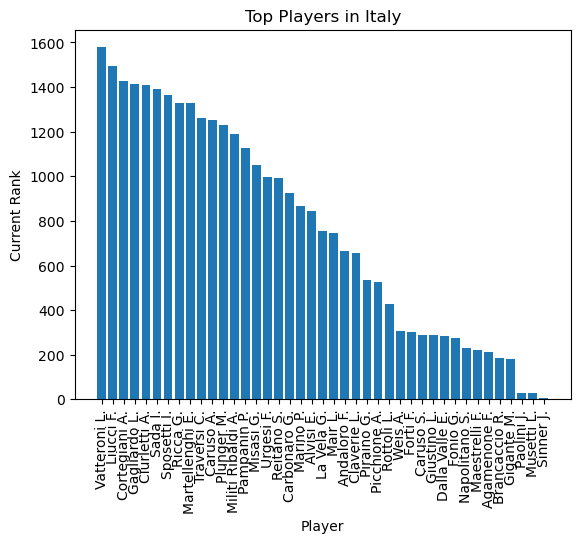

country USA
               name  current_rank country
187     Galloway R.        1500.0     USA
358       Zusman R.        1473.0     USA
122       Zusman R.        1473.0     USA
237       Atturu S.        1368.0     USA
384        Brown T.        1362.0     USA
224       Rivera H.        1341.0     USA
32       Razeghi A.        1230.0     USA
395       Svajda T.        1183.0     USA
246       Svajda T.        1183.0     USA
159      Willson D.         946.0     USA
252    Wiersholm H.         899.0     USA
54         Grant W.         837.0     USA
208        Grant W.         837.0     USA
332        Reami A.         807.0     USA
365        Hance K.         806.0     USA
172        Hance K.         806.0     USA
264       Horvit M.         790.0     USA
258         Lea Ma.         700.0     USA
121       Blanch D.         652.0     USA
318       Blanch D.         652.0     USA
240        Perez A.         599.0     USA
56         Smith K.         591.0     USA
32         Smith K.   

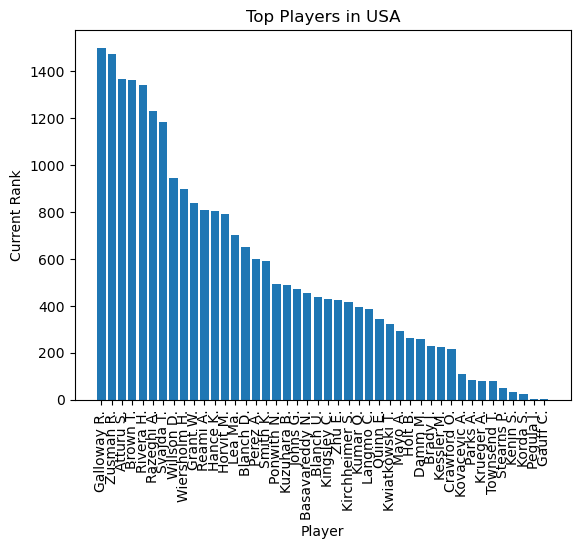

country Argentina
                    name  current_rank    country
224            Cundom J.        1495.0  Argentina
201            Derdoy F.        1489.0  Argentina
319            Derdoy F.        1489.0  Argentina
379            Derdoy F.        1489.0  Argentina
208          Cigarran T.        1487.0  Argentina
215           De Dios F.        1474.0  Argentina
209           Simonit E.        1430.0  Argentina
381           Simonit E.        1430.0  Argentina
381           Arangio G.        1363.0  Argentina
231         Falabella L.        1359.0  Argentina
226  Mouilleron Salvo M.        1314.0  Argentina
380  Mouilleron Salvo M.        1314.0  Argentina
217             Rabin S.        1307.0  Argentina
210       Andreazzini A.        1267.0  Argentina
213          Burstein M.        1218.0  Argentina
371        Carnevalle L.        1166.0  Argentina
108        Carnevalle L.        1166.0  Argentina
207          Vilicich B.        1163.0  Argentina
376          Vilicich B.        

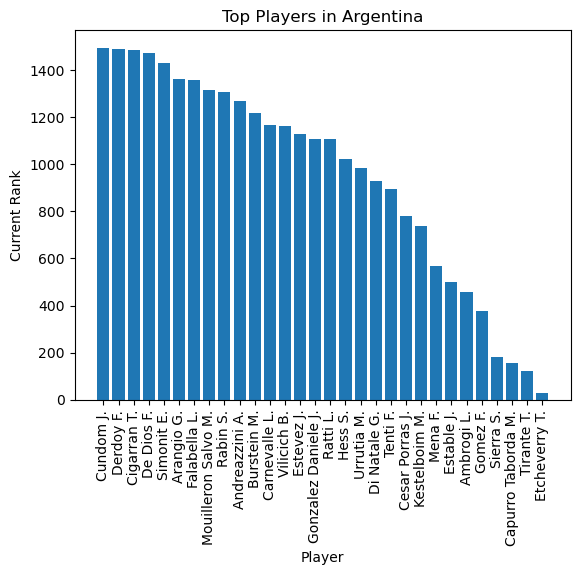

country Germany
                   name  current_rank  country
339        Loccisano M.        1800.0  Germany
82         Loccisano M.        1800.0  Germany
85             Heger T.        1438.0  Germany
377  Dedura-Palomero M.        1403.0  Germany
204  Dedura-Palomero M.        1403.0  Germany
101            Vanik J.        1289.0  Germany
340            Vanik J.        1289.0  Germany
351          Wallner M.        1274.0  Germany
141          Wallner M.        1274.0  Germany
432            Maute J.        1191.0  Germany
385            Maute J.        1191.0  Germany
118          Voracek E.        1181.0  Germany
282          Voracek E.        1181.0  Germany
241            Drozd M.        1142.0  Germany
376              Fix D.        1117.0  Germany
109              Fix D.        1117.0  Germany
103             Vogt M.        1003.0  Germany
283             Vogt M.        1003.0  Germany
180           Schell N.         956.0  Germany
370           Zahraj P.         902.0  Germa

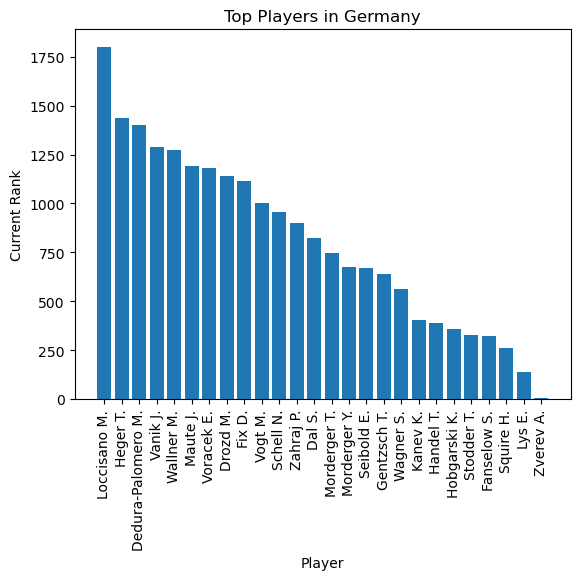

country Spain
                              name  current_rank country
168            Oliver Moratalla V.        1362.0   Spain
349            Oliver Moratalla V.        1362.0   Spain
146                      Molino J.        1354.0   Spain
316             Parres Azcoitia O.        1234.0   Spain
126             Parres Azcoitia O.        1234.0   Spain
157             Izquierdo Luque R.        1058.0   Spain
317              Lopez Martinez C.        1043.0   Spain
128              Lopez Martinez C.        1043.0   Spain
131                Cervino Ruiz C.        1036.0   Spain
397              Curras Abasolo T.        1002.0   Spain
154              Curras Abasolo T.        1002.0   Spain
107           Manzanera Pertusa A.         722.0   Spain
328                Hoste Ferrer C.         636.0   Spain
144                Hoste Ferrer C.         636.0   Spain
129                  Echeverria J.         605.0   Spain
362            Mintegi Del Olmo A.         562.0   Spain
110              

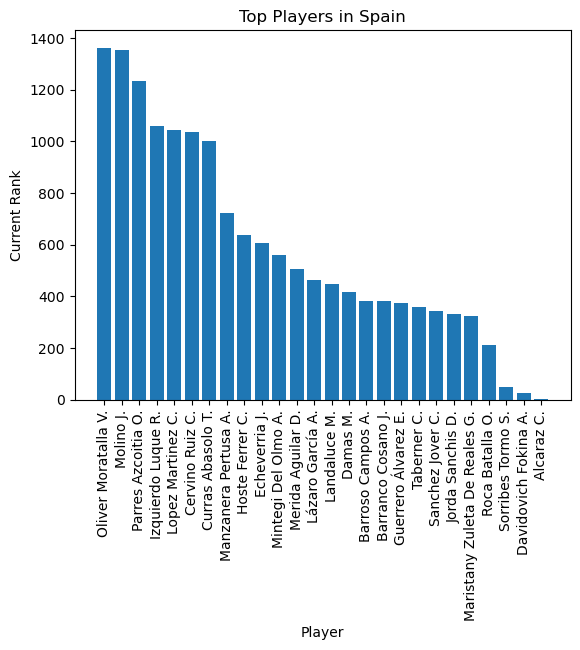

country Brazil
                      name  current_rank country
206            Oliveira C.        1555.0  Brazil
375            Oliveira C.        1555.0  Brazil
394       Wendler Filho J.        1500.0  Brazil
194       Wendler Filho J.        1500.0  Brazil
195       Roveri Sidney G.        1454.0  Brazil
217              Nusdeo J.        1454.0  Brazil
196         Cury Bueres M.        1412.0  Brazil
221                Leal V.        1349.0  Brazil
424                Leal V.        1349.0  Brazil
214           Fernandez B.        1343.0  Brazil
426           Fernandez B.        1343.0  Brazil
230               Bueno H.        1339.0  Brazil
351               Bossi C.        1269.0  Brazil
169               Bossi C.        1269.0  Brazil
222               Vidal L.        1208.0  Brazil
211  Saraiva Dos Santos P.         984.0  Brazil
320  Saraiva Dos Santos P.         984.0  Brazil
199             Tosetto R.         983.0  Brazil
387               Gulin G.         951.0  Brazil
198  

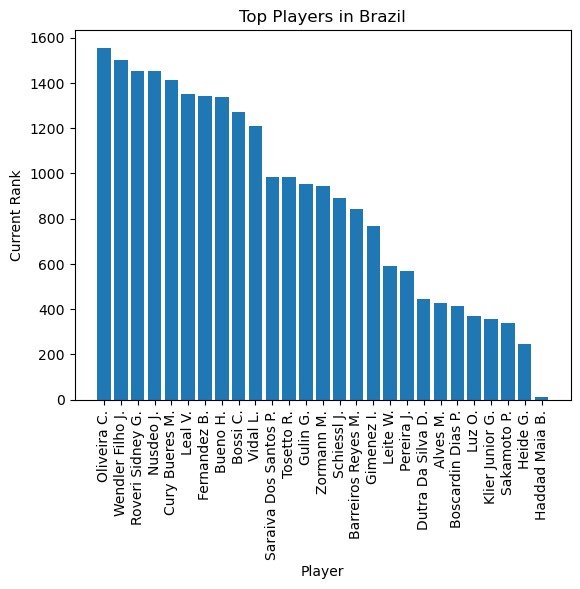

country Australia
                name  current_rank    country
260          Cook E.        1473.0  Australia
356         Vujic S.        1454.0  Australia
61         Viiala Z.        1427.0  Australia
232        Viiala Z.        1427.0  Australia
255      Delaney Je.        1368.0  Australia
91   Van Rensburg S.        1357.0  Australia
410  Van Rensburg S.        1357.0  Australia
233         Nayar A.        1346.0  Australia
61         Poulos A.        1335.0  Australia
250        Poulos A.        1335.0  Australia
234           Cui A.        1322.0  Australia
257         Talic Z.        1285.0  Australia
253         Papac T.        1283.0  Australia
230    Cvijanovic J.        1167.0  Australia
265      Ferguson C.        1151.0  Australia
261          Khan L.        1129.0  Australia
62       Marinkov P.        1104.0  Australia
251      Marinkov P.        1104.0  Australia
247      Thompson B.        1067.0  Australia
263         Krish M.        1025.0  Australia
231    Faircloug

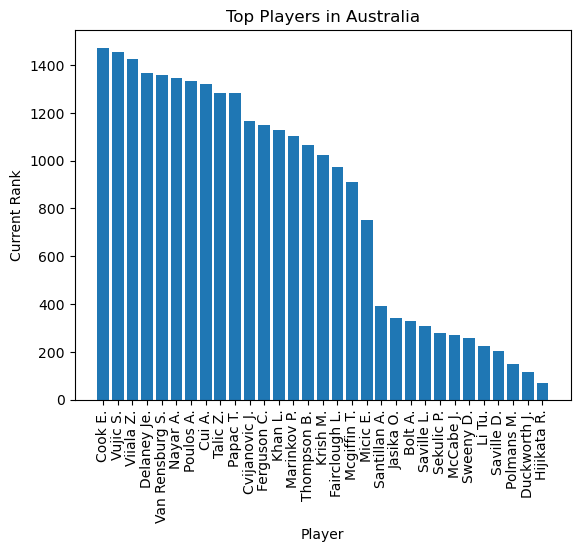

country Russia
               name  current_rank country
314      Fufygin M.        1800.0  Russia
347     Nesterov A.        1499.0  Russia
190     Nesterov A.        1499.0  Russia
401        Minin M.        1454.0  Russia
149        Minin M.        1454.0  Russia
93      Kukasian A.        1428.0  Russia
368     Kukasian A.        1428.0  Russia
104    Vasilyeva A.        1359.0  Russia
266   Zelinskaya D.        1307.0  Russia
317       Chayka A.        1304.0  Russia
97         Ianin N.        1278.0  Russia
415        Ianin N.        1278.0  Russia
301  Chekanskaya A.        1155.0  Russia
165  Chekanskaya A.        1155.0  Russia
153     Garkusha E.        1020.0  Russia
130    Grechkina A.         941.0  Russia
297    Grechkina A.         941.0  Russia
168   Arifullina A.         940.0  Russia
257     Zakharov A.         728.0  Russia
419   Karlovskiy E.         574.0  Russia
182   Karlovskiy E.         574.0  Russia
291    Melnikova M.         525.0  Russia
295   Ibragimova A.

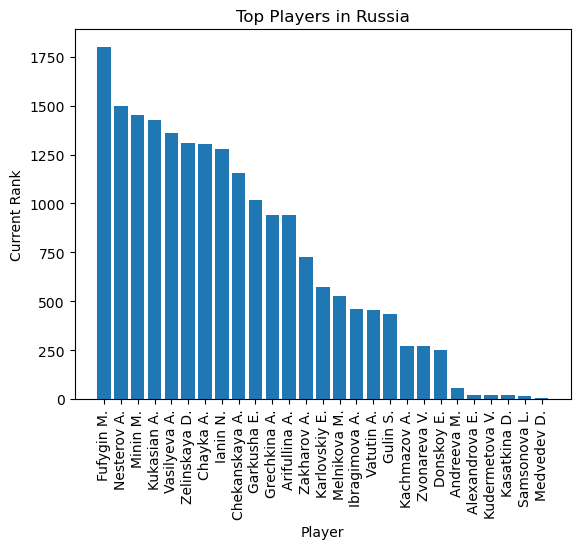

country United Kingdom
            name  current_rank         country
371   Murgett F.        1438.0  United Kingdom
88    Murgett F.        1438.0  United Kingdom
151   Murgett B.        1363.0  United Kingdom
92      Jones A.        1337.0  United Kingdom
412     Jones A.        1337.0  United Kingdom
127  Bartlett A.        1329.0  United Kingdom
298  Bartlett A.        1329.0  United Kingdom
203    Reayer A.        1307.0  United Kingdom
162   Thomson C.        1293.0  United Kingdom
315  Stephens Z.        1279.0  United Kingdom
86     Martin T.        1157.0  United Kingdom
303    Martin T.        1157.0  United Kingdom
125      Tatu S.        1147.0  United Kingdom
296      Tatu S.        1147.0  United Kingdom
62     Parker S.         731.0  United Kingdom
50    Stewart H.         651.0  United Kingdom
79    Stewart H.         651.0  United Kingdom
334  Christie F.         637.0  United Kingdom
114       Cox D.         436.0  United Kingdom
278       Cox D.         436.0  Unite

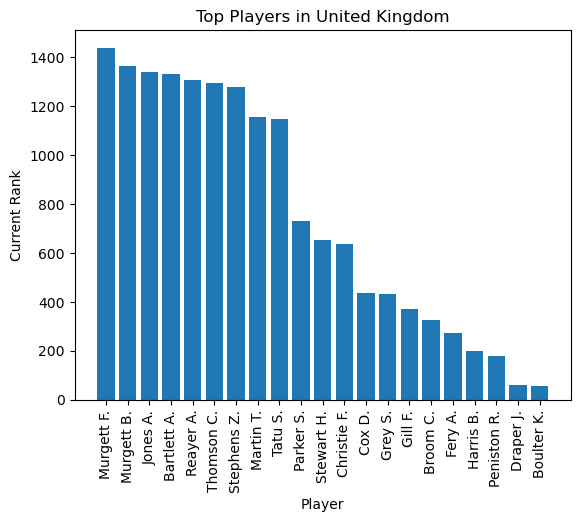

country Czech Republic
               name  current_rank         country
344       Kalina V.        1454.0  Czech Republic
383       Kalina V.        1454.0  Czech Republic
170       Kalina V.        1454.0  Czech Republic
95         Panák Y.        1439.0  Czech Republic
334        Panák Y.        1439.0  Czech Republic
102    Slavíková E.        1220.0  Czech Republic
339    Slavíková E.        1220.0  Czech Republic
116     Břečková N.        1177.0  Czech Republic
204       Poljak D.         949.0  Czech Republic
273       Gengel M.         590.0  Czech Republic
408      Kucmova A.         414.0  Czech Republic
177      Kucmova A.         414.0  Czech Republic
255        Palan D.         330.0  Czech Republic
76       Paulson A.         316.0  Czech Republic
78    Bartunkova N.         294.0  Czech Republic
405       Veselý J.         292.0  Czech Republic
206       Veselý J.         292.0  Czech Republic
41   Fruhvirtová L.          92.0  Czech Republic
8         Machač T.        

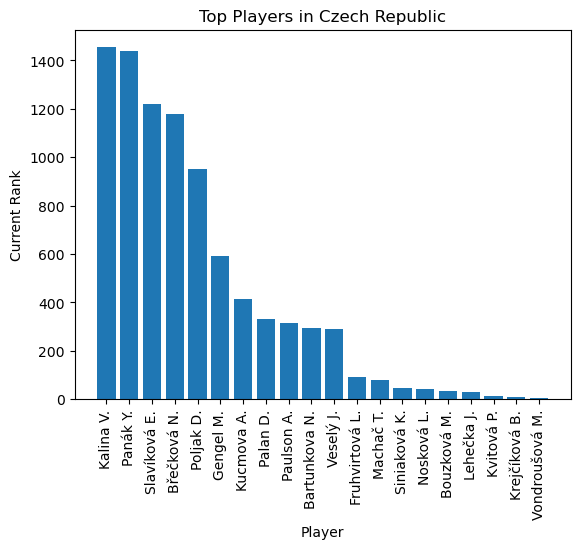

country Japan
               name  current_rank country
245        Tsuda R.        1377.0   Japan
248        Ozeki A.        1346.0   Japan
243       Miyata M.        1329.0   Japan
249     Hosonuma C.        1261.0   Japan
246  Higashitani N.        1225.0   Japan
63   Chikaraishi Y.        1211.0   Japan
262  Chikaraishi Y.        1211.0   Japan
175       Sonobe W.        1200.0   Japan
49        Sonobe W.        1200.0   Japan
236     Hasegawa M.        1189.0   Japan
256       Tajima N.        1173.0   Japan
280       Nagata A.        1027.0   Japan
273      Katsumi N.         978.0   Japan
274      Matsuda R.         915.0   Japan
277        Saigo Y.         862.0   Japan
278    Nishimura K.         820.0   Japan
276       Kozaki F.         714.0   Japan
244         Sato H.         648.0   Japan
355      Trotter J.         461.0   Japan
269       Moriya H.         406.0   Japan
270       Uchida K.         307.0   Japan
290     Uchiyama Y.         269.0   Japan
302  Shimabukuro S. 

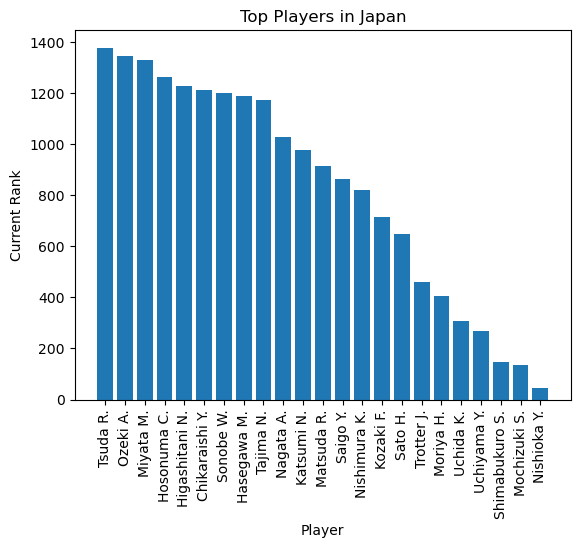

country Slovakia
               name  current_rank   country
348          Nad P.        1473.0  Slovakia
161          Nad P.        1473.0  Slovakia
384          Nad P.        1473.0  Slovakia
92      Michalik R.        1470.0  Slovakia
336     Michalik R.        1470.0  Slovakia
113   Kovacicova S.        1331.0  Slovakia
114   Marusinova M.        1329.0  Slovakia
373  Vojcinakova I.        1289.0  Slovakia
100  Vojcinakova I.        1289.0  Slovakia
97        Puskar S.        1162.0  Slovakia
332       Puskar S.        1162.0  Slovakia
375        Balus I.         989.0  Slovakia
105        Balus I.         989.0  Slovakia
115        Lanik T.         922.0  Slovakia
369        Lanik T.         922.0  Slovakia
329   Jamrichova R.         772.0  Slovakia
77      Privara  P.         725.0  Slovakia
146   Zelnickova R.         620.0  Slovakia
130      Pokorny L.         578.0  Slovakia
290      Pokorny L.         578.0  Slovakia
72       Kužmova K.         517.0  Slovakia
325    Morvayov

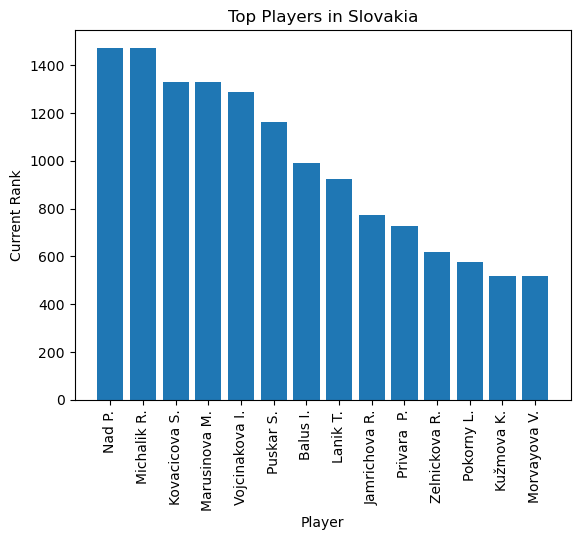

country Ukraine
               name  current_rank  country
89        Mossur M.        1717.0  Ukraine
416       Mossur M.        1717.0  Ukraine
98   Podorozhnyi A.        1428.0  Ukraine
89    Uzhylovsky V.        1341.0  Ukraine
369   Uzhylovsky V.        1341.0  Ukraine
314    Pochtovyk K.        1322.0  Ukraine
361   Lopatetska D.         863.0  Ukraine
366         Kolb N.         614.0  Ukraine
174         Kolb N.         614.0  Ukraine
112        Orlov V.         602.0  Ukraine
137       Podrez V.         514.0  Ukraine
398       Podrez V.         514.0  Ukraine
333      Krutykh O.         295.0  Ukraine
184      Krutykh O.         295.0  Ukraine
68        Baindl K.         132.0  Ukraine
44      Tsurenko L.          31.0  Ukraine
27      Kalinina A.          27.0  Ukraine
46      Kalinina A.          27.0  Ukraine
-----------------------


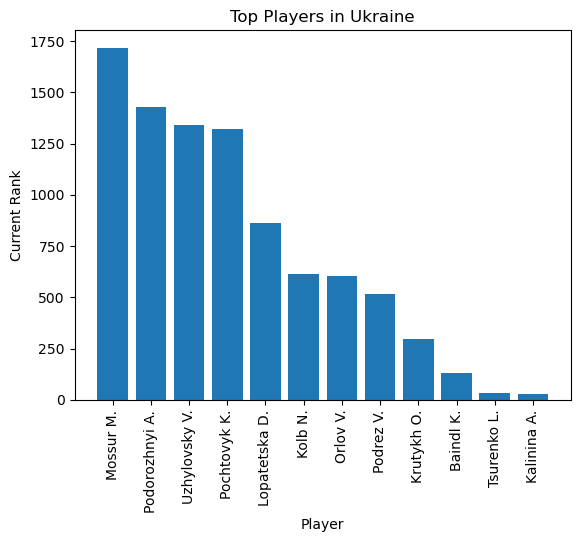

country Portugal
             name  current_rank   country
158     Falcão G.        1430.0  Portugal
152     Garcia M.        1346.0  Portugal
159     Coelho F.        1215.0  Portugal
145      Lanca S.        1089.0  Portugal
194      Rocha F.         929.0  Portugal
181     Araujo P.         857.0  Portugal
163  Domingues J.         806.0  Portugal
193    Pereira T.         764.0  Portugal
149      Jorge M.         580.0  Portugal
185       Vale D.         580.0  Portugal
327      Jorge M.         580.0  Portugal
309      Faria J.         412.0  Portugal
165      Faria J.         412.0  Portugal
363      Rocha H.         246.0  Portugal
160      Rocha H.         246.0  Portugal
345   Oliveira G.         224.0  Portugal
-----------------------


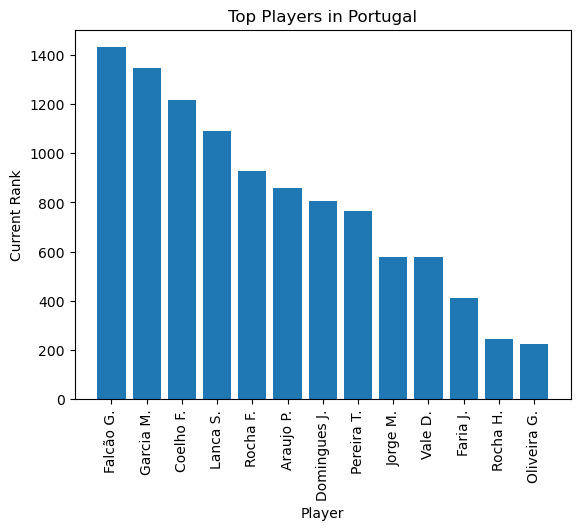

country Poland
               name  current_rank country
96         Filar K.        1500.0  Poland
414        Filar K.        1500.0  Poland
270      Bednarz Z.        1140.0  Poland
129       Lipiec X.        1090.0  Poland
299       Lipiec X.        1090.0  Poland
427       Lincer O.         673.0  Poland
72       Feistel G.         616.0  Poland
105     Pawelski M.         484.0  Poland
70         Kubka M.         361.0  Poland
326        Kubka M.         361.0  Poland
203  Kasnikowski M.         324.0  Poland
63         Fręch M.          73.0  Poland
28       Linette M.          24.0  Poland
34       Linette M.          24.0  Poland
48       Świątek I.           1.0  Poland
-----------------------


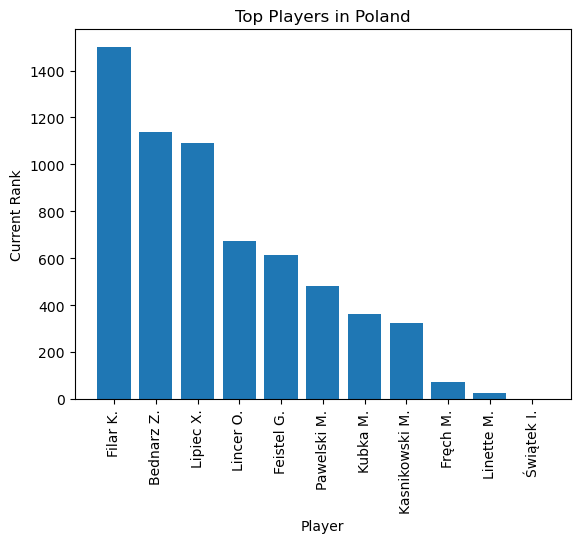

country Bulgaria
                name  current_rank   country
80       Milushev P.        1478.0  Bulgaria
287      Milushev P.        1478.0  Bulgaria
435      Milushev P.        1478.0  Bulgaria
429         Genov A.        1444.0  Bulgaria
316         Genov A.        1444.0  Bulgaria
94          Dinev D.        1415.0  Bulgaria
150  Sheyngezikht L.        1176.0  Bulgaria
399  Sheyngezikht L.        1176.0  Bulgaria
145     Nedelchev N.         955.0  Bulgaria
402     Nedelchev N.         955.0  Bulgaria
73          Milev Y.         488.0  Bulgaria
22       Dimitrov G.          14.0  Bulgaria
21       Dimitrov G.          14.0  Bulgaria
-----------------------


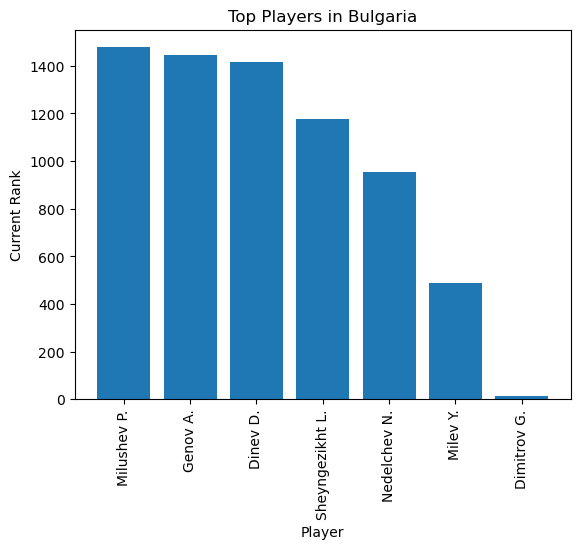

country Switzerland
               name  current_rank      country
191        Orlov A.        1473.0  Switzerland
388        Orlov A.        1473.0  Switzerland
338  Malgiaritta M.        1454.0  Switzerland
96   Malgiaritta M.        1454.0  Switzerland
267    Cembranos P.        1123.0  Switzerland
325     Kozakova K.         964.0  Switzerland
353    Laaksonen H.         565.0  Switzerland
183    Laaksonen H.         565.0  Switzerland
183      Bertola R.         394.0  Switzerland
364      Bertola R.         394.0  Switzerland
284      Bellier A.         245.0  Switzerland
202      Bellier A.         245.0  Switzerland
-----------------------


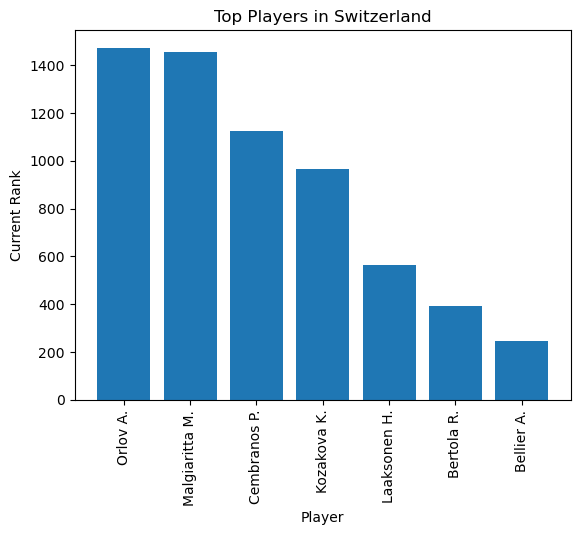

country China
           name  current_rank country
297     Zhou Y.         900.0   China
283     Xiao L.         738.0   China
306       Mu T.         672.0   China
304  Hanwen Li.         540.0   China
38      Tian F.         484.0   China
291      Sun F.         434.0   China
60        Ma Y.         218.0   China
31      Yuan Y.          76.0   China
39    Wang Xiy.          69.0   China
44       Zhu L.          37.0   China
42    Wang Xin.          36.0   China
37     Zheng Q.          15.0   China
-----------------------


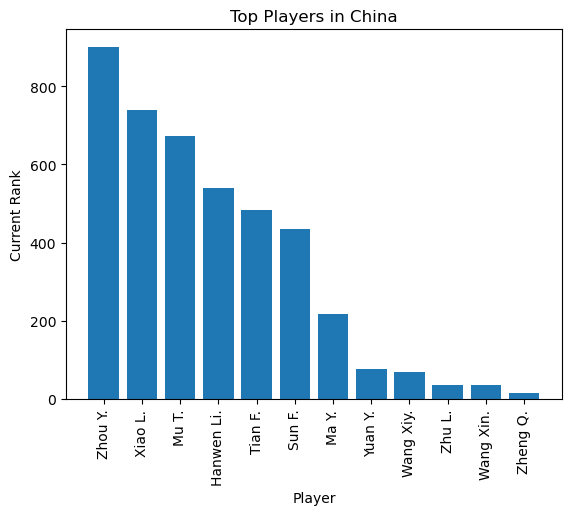

country Romania
           name  current_rank  country
103  Ionescu I.        1368.0  Romania
377  Ionescu I.        1368.0  Romania
318    Vanta V.        1346.0  Romania
81     Vanta V.        1346.0  Romania
379    Bulat B.        1307.0  Romania
101    Bulat B.        1307.0  Romania
428    Safta A.         938.0  Romania
111    Safta A.         938.0  Romania
176  Amariei I.         359.0  Romania
367  Amariei I.         359.0  Romania
-----------------------


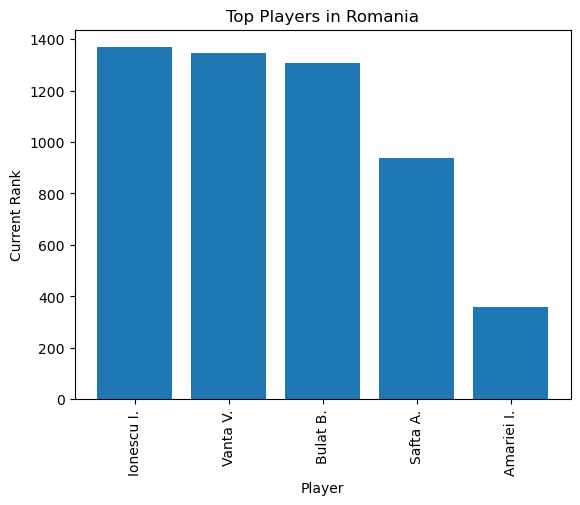

In [38]:
df_away_team = pd.read_csv('df_away_team.csv', usecols=['name', 'current_rank', 'country'])
df_home_team = pd.read_csv('df_home_team.csv', usecols=['name', 'current_rank', 'country'])

combined_df = pd.concat([df_home_team, df_away_team])
sorted_df = combined_df.sort_values(by='current_rank', ascending=False)

grouped_df = sorted_df.groupby('country')
player_counts = grouped_df.size().sort_values(ascending=False)

top_countries = player_counts[player_counts >= 10].index

for country in top_countries:
    top_country_players = sorted_df[(sorted_df['country'] == country) & (sorted_df['current_rank'] > 0)]
    if len(top_country_players) >= 10:
        print("country",country)
        print(top_country_players[['name', 'current_rank', 'country']])
        print("-----------------------")
        plt.figure()
        plt.bar(top_country_players['name'], top_country_players['current_rank'])
        plt.xlabel('Player')
        plt.ylabel('Current Rank')
        plt.title(f'Top Players in {country}')
        plt.xticks(rotation=90)
        plt.show()
        

# 4.How many sets are usually played in a tennis match?

In [104]:
df_power = pd.read_csv('df_power.csv',usecols = ['match_id','set_num'])
df = df_power.groupby('match_id')['set_num'].max()
modes = df.mode()
modes


0    2
Name: set_num, dtype: int64

# ⁘Average number of sets played per game

In [105]:
df = df_power.groupby('match_id')['set_num'].max()
mean_df = df.mean()
mean_df

2.1853932584269664

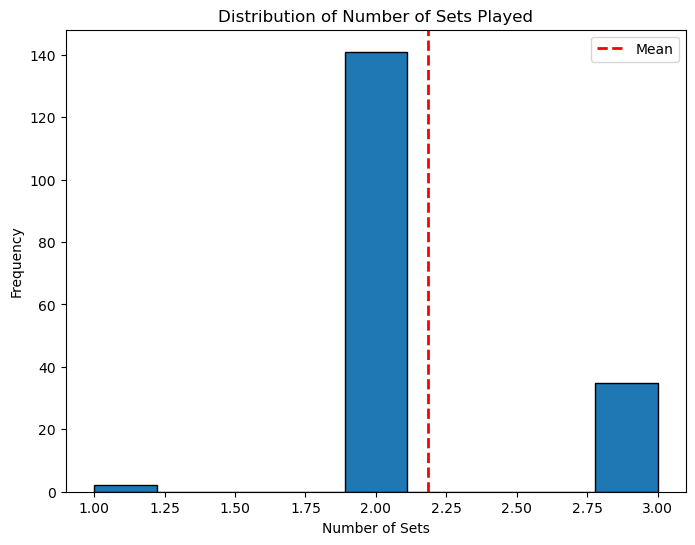

In [106]:
plt.figure(figsize=(8, 6))
plt.axvline(mean_df, color='red', linestyle='--', linewidth=2)
plt.hist(df, bins='auto', edgecolor='black')
plt.xlabel('Number of Sets')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Sets Played')
plt.legend(['Mean'])
plt.show()